In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

In [4]:
cd C:\Users\Smit Sunesara\Downloads\PROJECTS\Titanic Survival

C:\Users\Smit Sunesara\Downloads\PROJECTS\Titanic Survival


In [5]:
df = pd.read_csv('Titanic Survival.csv')

In [6]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


**Working with Models**

# 1) Create the target data and feature data where target data is survived

In [12]:
X = df.drop(['Survived','Name','Ticket'],axis=1)
y = df.Survived

In [13]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,female,38.0,1,0,71.2833,C85,C
3,4,1,female,35.0,1,0,53.1000,C123,S
6,7,1,male,54.0,0,0,51.8625,E46,S
10,11,3,female,4.0,1,1,16.7000,G6,S
11,12,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,1,female,47.0,1,1,52.5542,D35,S
872,873,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,female,56.0,0,1,83.1583,C50,C
887,888,1,female,19.0,0,0,30.0000,B42,S


# 2) apply label-encoding on categorical data

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
enc =LabelEncoder()

In [16]:
X['Sex'] = enc.fit_transform(X['Sex'])

In [17]:
X['Cabin'] = enc.fit_transform(X['Cabin'])
X['Embarked'] = enc.fit_transform(X['Embarked'])

In [18]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,72,0
3,4,1,0,35.0,1,0,53.1000,48,2
6,7,1,1,54.0,0,0,51.8625,117,2
10,11,3,0,4.0,1,1,16.7000,131,2
11,12,1,0,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,52.5542,91,2
872,873,1,1,33.0,0,0,5.0000,29,2
879,880,1,0,56.0,0,1,83.1583,61,0
887,888,1,0,19.0,0,0,30.0000,25,2


# 3) Split the data into Training and testing Set 

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# 4) Create a Logistic regression model for Target and feature data


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Smit Sunesara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
clf.score(X_test,y_test)

0.6486486486486487

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [24]:
y_pred = clf.predict(X_test)

# 5) Display the Confusion Matrix

In [25]:
confusion_matrix(y_pred,y_test)

array([[ 6,  4],
       [ 9, 18]], dtype=int64)

# 6)  Find the Accuracy Score 

In [26]:
accuracy_score(y_pred,y_test)

0.6486486486486487

# 7) Find the Precision Score 

In [27]:
precision_score(y_pred,y_test)

0.8181818181818182

# 8) Find the Recall Score 

In [28]:
recall_score(y_pred,y_test)

0.6666666666666666

# 9) Find the F1 Score 

In [29]:
f1_score(y_pred,y_test)

0.7346938775510203

# 10) Find the probability of testing data 

In [30]:
y_prob = clf.predict_proba(X_test)

In [31]:
y_prob

array([[0.01429522, 0.98570478],
       [0.22680398, 0.77319602],
       [0.60409248, 0.39590752],
       [0.11551944, 0.88448056],
       [0.04806187, 0.95193813],
       [0.18076368, 0.81923632],
       [0.05784896, 0.94215104],
       [0.20375672, 0.79624328],
       [0.1513277 , 0.8486723 ],
       [0.21357046, 0.78642954],
       [0.16917956, 0.83082044],
       [0.35312099, 0.64687901],
       [0.22245525, 0.77754475],
       [0.84046856, 0.15953144],
       [0.0596305 , 0.9403695 ],
       [0.55334863, 0.44665137],
       [0.89214287, 0.10785713],
       [0.03360691, 0.96639309],
       [0.04488197, 0.95511803],
       [0.2006286 , 0.7993714 ],
       [0.45414168, 0.54585832],
       [0.10739976, 0.89260024],
       [0.72668726, 0.27331274],
       [0.22826157, 0.77173843],
       [0.10037762, 0.89962238],
       [0.6620743 , 0.3379257 ],
       [0.05017225, 0.94982775],
       [0.0353217 , 0.9646783 ],
       [0.22743355, 0.77256645],
       [0.42644966, 0.57355034],
       [0.

# 11) Display ROC Curve and find the AUC score 

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

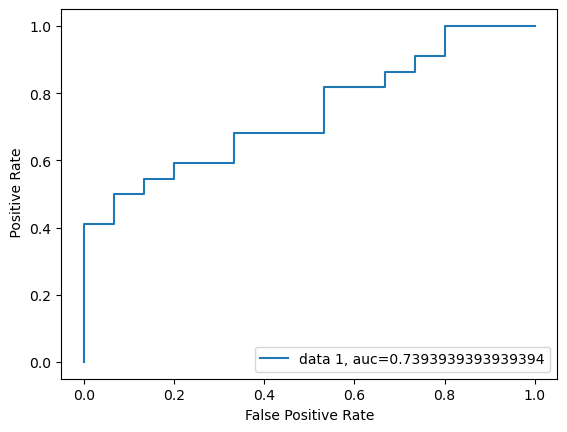

In [33]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()